In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
data = pd.read_excel('discount.xlsx')

### 1. Общая информация

In [3]:
# посмотрим на набор данных
data.sample(10)

,cid,lid,value,term,before_dicount,promo,loyalty_level,loyalty_discount
1538,4430381,1455840,13800,56,0.99,0.15,NaN,NaN
1890,1297263,1456538,3000,40,1.00,NaN,0.0,0.02
8899,2718420,1470130,5000,23,1.00,NaN,8.0,0.16
28349,4497007,1509228,9000,42,0.99,0.15,NaN,NaN
27978,4528160,1508544,18000,19,1.00,NaN,5.0,0.10
12565,4667749,1477525,6500,10,1.00,NaN,2.0,0.04
16608,4579077,1485596,19000,40,1.00,0.15,NaN,NaN
4600,3543530,1461988,3800,10,1.00,NaN,4.0,0.08
5765,4506586,1464162,10000,56,0.99,0.15,NaN,NaN
14992,4099548,1482381,34500,70,0.99,0.26,NaN,NaN


- cid - id клиента
- lid - id займа
- value - сумма займа
- term - запрошенный срок займа
- before_dicount - ставка до скидки
- promo - скидка по промокоду
- loyalty_level - уровень программы лояльности
- loyalty_discount - скидка по программе лояльности

In [4]:
# посмотрим на общую информацию таблицы
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cid               30000 non-null  int64  
 1   lid               30000 non-null  int64  
 2   value             30000 non-null  int64  
 3   term              30000 non-null  int64  
 4   before_dicount    30000 non-null  float64
 5   promo             9156 non-null   float64
 6   loyalty_level     18736 non-null  float64
 7   loyalty_discount  18736 non-null  float64
dtypes: float64(4), int64(4)
memory usage: 1.8 MB


In [5]:
# проверим таблицу на наличие дубликатов
data.duplicated().sum()

0

In [6]:
# проверим таблицу на наличие пропусков
data.isnull().sum()

cid                     0
lid                     0
value                   0
term                    0
before_dicount          0
promo               20844
loyalty_level       11264
loyalty_discount    11264
dtype: int64

<div class="alert alert-block alert-info">
<ul>
    <li> в таблице 30 000 строк
    <li> каждая строка - информация об уникальном займе
    <li> в столбцах promo, loyalty_level, loyalty_discount есть пропуски
</ul>
</div>

### 2. Исследование скидочных промокодов

#### 2.1 Общая информация

In [7]:
data['promo'].describe()

count    9156.000000
mean        0.191623
std         0.105013
min         0.100000
25%         0.150000
50%         0.150000
75%         0.150000
max         0.500000
Name: promo, dtype: float64

In [8]:
data['promo'].mode()

0    0.15
dtype: float64

<div class="alert alert-block alert-info">
<ul>
    <li> в столбце promo данные имеются только в 9156 строках
    <li> т.о. из 30 000 займов 30.5% выдаются со скидками 
    <li> среднияя скидка (mean) 19.16%
    <li> медианная скидка (50%) 15%
    <li> мода (самоя частая скидка) также 15%
</ul>
</div>

#### 2.2 Распределение

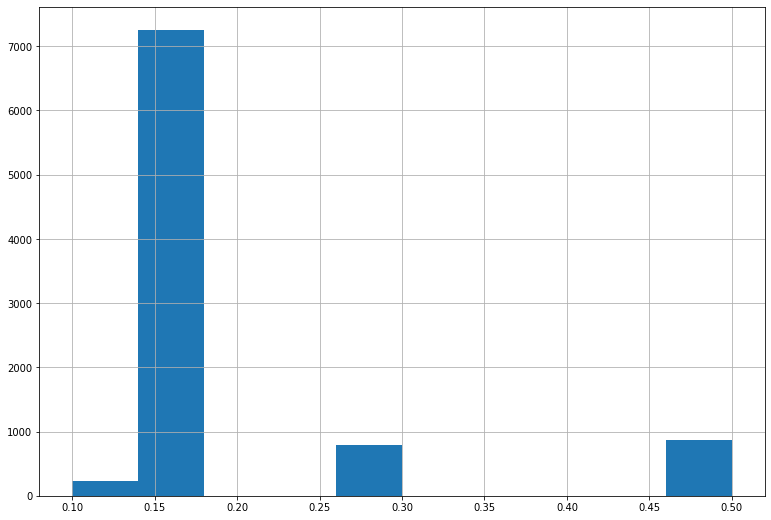

In [9]:
data['promo'].hist(bins=10, figsize=(13, 9));

In [10]:
data['promo'].value_counts()

0.15    7202
0.50     870
0.26     798
0.10     234
0.16      52
Name: promo, dtype: int64

<div class="alert alert-block alert-info">
<ul>
    <li> чаще всего займы оформляются со скидкой 15%
    <li> на втором месте 50%
    <li> на 3 и 5 месте станные суммы в 26% и 16% соответственно
</ul>
</div>

#### 2.2 Расчет средневзвешенной скидки

In [11]:
promo = data[data['promo'].notna()].drop(columns=['loyalty_level', 'loyalty_discount']).reset_index(drop=True)

In [12]:
promo['profitBeforeDiscount'] = promo['value'] * (promo['term'] * promo['before_dicount']) / 100
promo['profitAfterDiscount'] = promo['value'] * (promo['term'] * (promo['before_dicount'] - promo['promo'])) / 100

In [13]:
promo.head()

,cid,lid,value,term,before_dicount,promo,profitBeforeDiscount,profitAfterDiscount
0,4316626,1449670,14000,40,1.00,0.15,5600.000,4760.000
1,4534475,1450071,8050,23,1.00,0.15,1851.500,1573.775
2,4482293,1450192,17250,42,0.99,0.15,7172.550,6085.800
3,1338983,1452253,20815,56,0.99,0.15,11539.836,9791.376
4,3675968,1452255,10000,56,0.99,0.15,5544.000,4704.000
